In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(
    "/Users/gabrielmancillas/Documents/GitHub/StudentPerformancePrediction/dataset.csv"
)

In [44]:
curricular_units = df[
    [
        "Curricular units 1st sem (credited)",
        "Curricular units 1st sem (enrolled)",
        "Curricular units 1st sem (evaluations)",
        "Curricular units 1st sem (approved)",
        "Curricular units 1st sem (grade)",
        "Curricular units 1st sem (without evaluations)",
        "Curricular units 2nd sem (credited)",
        "Curricular units 2nd sem (enrolled)",
        "Curricular units 2nd sem (evaluations)",
        "Curricular units 2nd sem (approved)",
        "Curricular units 2nd sem (grade)",
        "Curricular units 2nd sem (without evaluations)",
    ]
]
curricular_units.head(20)

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0
1,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0
2,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0
3,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0
4,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0
5,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5
6,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0
7,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0
8,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0
9,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0


In [45]:
# numbers of students
df.shape

(4424, 35)

In [46]:
df.rename(columns={"Nacionality": "Nationality"}, inplace=True)

In [47]:
df.describe().round(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,...,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000
mean,1.179,6.887,1.728,9.899,0.891,2.531,1.255,12.322,16.455,7.318,...,0.138,0.542,6.232,8.063,4.436,10.230,0.150,11.566,1.228,0.002
std,0.606,5.299,1.314,4.332,0.312,3.964,1.748,9.026,11.045,3.998,...,0.691,1.919,2.196,3.948,3.015,5.211,0.754,2.664,1.383,2.270
min,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.600,-0.800,-4.060
25%,1.000,1.000,1.000,6.000,1.000,1.000,1.000,2.000,3.000,5.000,...,0.000,0.000,5.000,6.000,2.000,10.750,0.000,9.400,0.300,-1.700
50%,1.000,8.000,1.000,10.000,1.000,1.000,1.000,13.000,14.000,6.000,...,0.000,0.000,6.000,8.000,5.000,12.200,0.000,11.100,1.400,0.320
75%,1.000,12.000,2.000,13.000,1.000,1.000,1.000,22.000,27.000,10.000,...,0.000,0.000,7.000,10.000,6.000,13.333,0.000,13.900,2.600,1.790
max,6.000,18.000,9.000,17.000,1.000,17.000,21.000,29.000,34.000,32.000,...,12.000,19.000,23.000,33.000,20.000,18.571,12.000,16.200,3.700,3.510


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [49]:
# Check if the column exists in the dataframe
if "Curricular units 1st sem (grade)" in df.columns:
    print(df["Curricular units 1st sem (grade)"])
else:
    print("Column not found. Available columns are:", df.columns)

0        0.000000
1       14.000000
2        0.000000
3       13.428571
4       12.333333
          ...    
4419    13.600000
4420    12.000000
4421    14.912500
4422    13.800000
4423    11.666667
Name: Curricular units 1st sem (grade), Length: 4424, dtype: float64


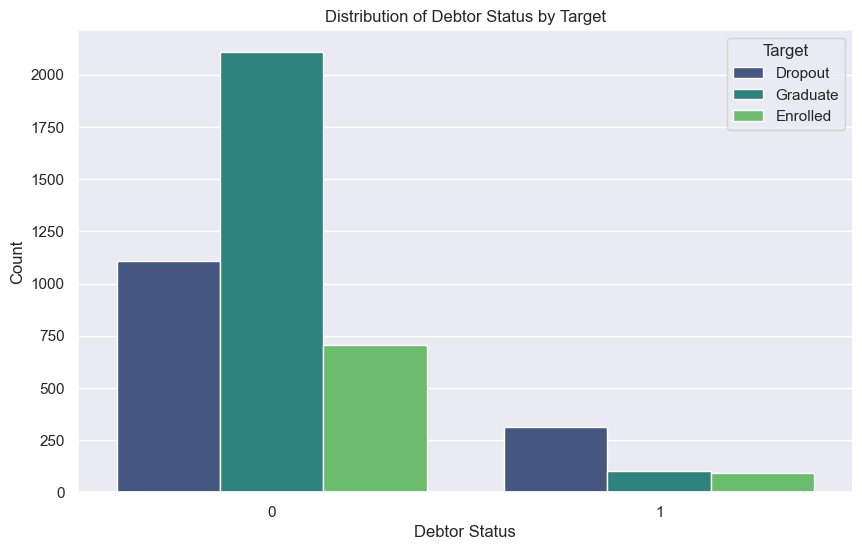

In [50]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

# EDA for Debtor feature
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Debtor", hue="Target", palette="viridis")
plt.title("Distribution of Debtor Status by Target")
plt.xlabel("Debtor Status")
plt.ylabel("Count")
plt.legend(title="Target")
plt.show()

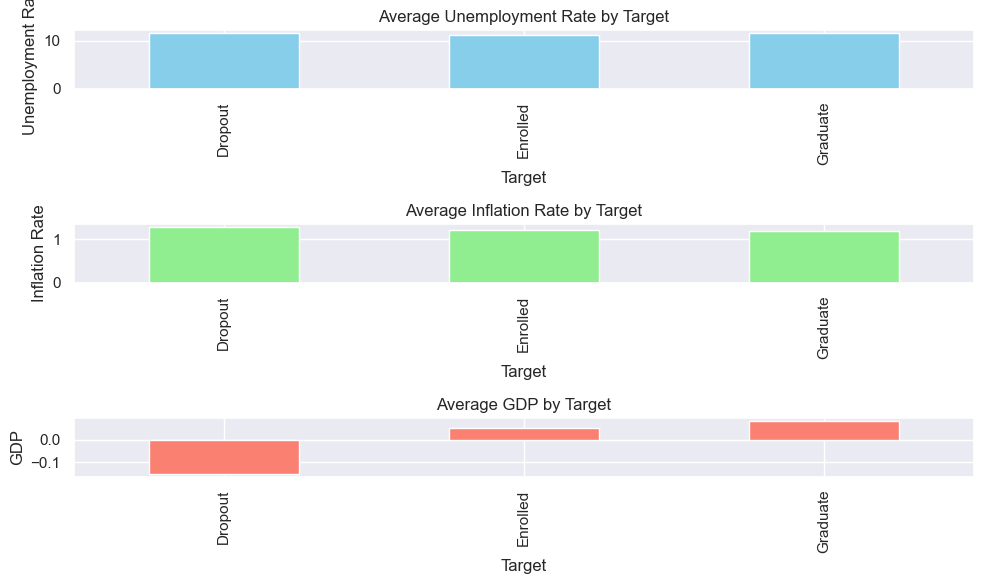

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data based on the provided dataset
data_GDP = {
    "Unemployment rate": df["Unemployment rate"].tolist(),
    "Inflation rate": df["Inflation rate"].tolist(),
    "GDP": df["GDP"].tolist(),
    "Target": df["Target"].tolist(),
}
# Plotting the Unemployment rate, Inflation rate, and GDP for Dropout vs Graduate
plt.figure(figsize=(10, 6))

# Plot Unemployment rate
plt.subplot(3, 1, 1)
df.groupby("Target")["Unemployment rate"].mean().plot(kind="bar", color="skyblue")
plt.title("Average Unemployment Rate by Target")
plt.ylabel("Unemployment Rate")

# Plot Inflation rate
plt.subplot(3, 1, 2)
df.groupby("Target")["Inflation rate"].mean().plot(kind="bar", color="lightgreen")
plt.title("Average Inflation Rate by Target")
plt.ylabel("Inflation Rate")

# Plot GDP
plt.subplot(3, 1, 3)
df.groupby("Target")["GDP"].mean().plot(kind="bar", color="salmon")
plt.title("Average GDP by Target")
plt.ylabel("GDP")

plt.tight_layout()
plt.show()

Here is a visualization of the macroeconomic indicators (Unemployment rate, Inflation rate, and GDP) at the time of students’ enrollment, grouped by their target outcome (Dropout or Graduate).

The bar charts show the average values of these indicators for each group:

	•	Unemployment rate: Higher for “Graduate” students in this small dataset.
	•	Inflation rate: Lower for “Graduate” students, with some negative inflation observed.
	•	GDP: Slightly higher for “Dropout” students in this dataset.


In [52]:
print(df.isna().sum())
print("Total Missing: ", df.isna().sum().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

**we are working zero missing values**

In [53]:
print("Total Duplicates: ", df.duplicated().sum())

Total Duplicates:  0


In [54]:
df["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

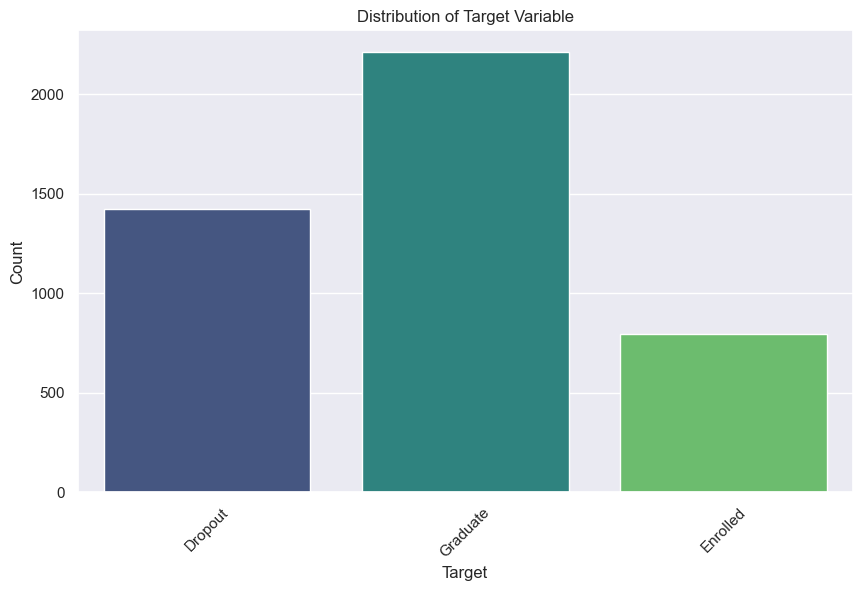

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Target", palette="viridis")
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [56]:
df = df[df.Target != "Enrolled"]

In [57]:
df.shape

(3630, 35)

In [58]:
freq_distribution = df["Target"].value_counts().to_frame(name="Count")
freq_distribution["% of Total"] = (
    df["Target"].value_counts(normalize=True) * 100
).round(2)
freq_distribution

,Count,% of Total
Target,,
Graduate,2209,60.85
Dropout,1421,39.15


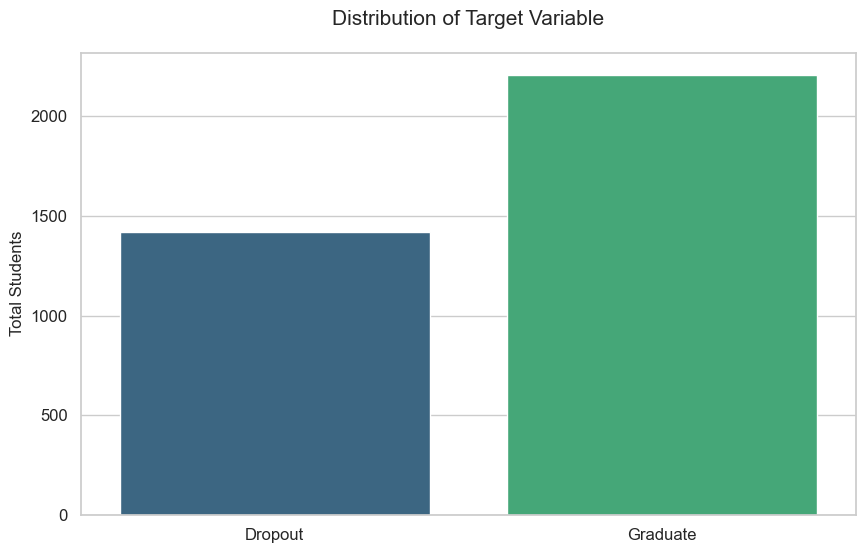

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Target", palette="viridis")  # Changed palette to 'viridis'

plt.ylabel("Total Students", fontsize=12)
plt.xlabel(None)
plt.title("Distribution of Target Variable", pad=20, fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

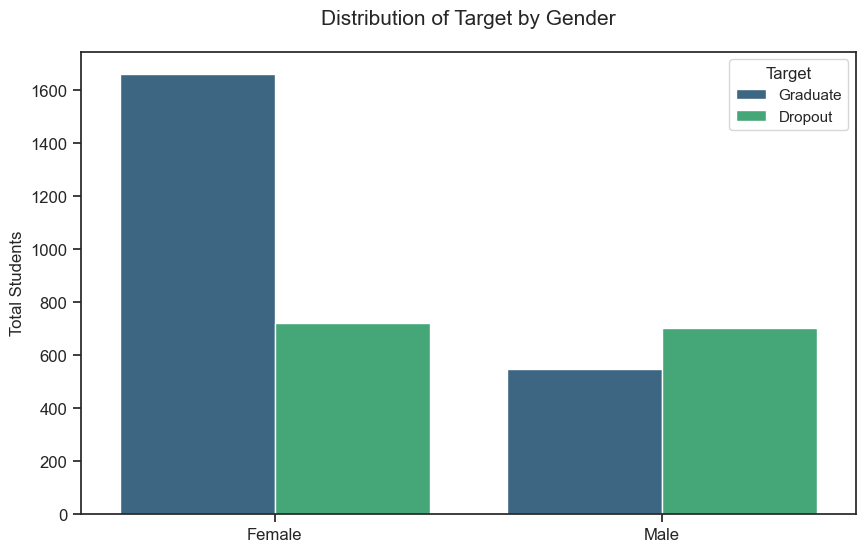

In [60]:
sns.set_style("ticks")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Gender", hue="Target", palette="viridis")

plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.ylabel("Total Students", fontsize=12)
plt.xlabel(None)
plt.title("Distribution of Target by Gender", pad=20, fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

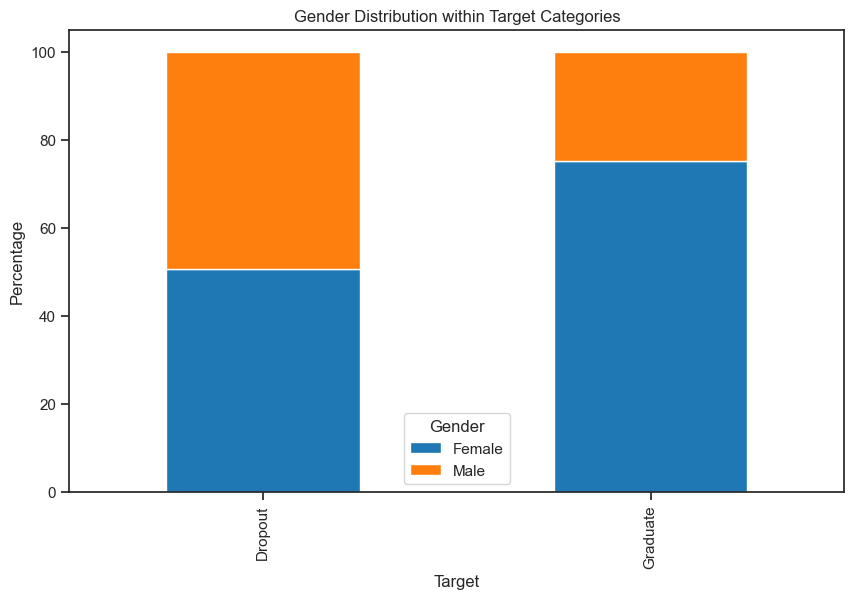

In [61]:
# Calculate the crosstab of Target and Gender
ct_gender = pd.crosstab(df["Target"], df["Gender"])

# Rename columns for better readability
ct_gender.columns = ["Female", "Male"]

# Calculate the percentage distribution within each Target category
ct_gender_percentage = ct_gender.div(ct_gender.sum(axis=1), axis=0) * 100

# Display the crosstab with counts and percentages
ct_gender_combined = ct_gender.copy()
ct_gender_combined["Female (%)"] = ct_gender_percentage["Female"]
ct_gender_combined["Male (%)"] = ct_gender_percentage["Male"]

# Add a column for the total percentage
ct_gender_combined["Total (%)"] = (
    ct_gender_combined["Female (%)"] + ct_gender_combined["Male (%)"]
)
ct_gender_combined

# Plot the percentage distribution using a stacked bar plot
ct_gender_percentage.plot(
    kind="bar", stacked=True, figsize=(10, 6), color=["#1f77b4", "#ff7f0e"]
)
plt.title("Gender Distribution within Target Categories")
plt.xlabel("Target")
plt.ylabel("Percentage")
plt.legend(title="Gender")
plt.show()

In [62]:
import plotly.express as px

# Create an interactive histogram with more bins
fig = px.histogram(
    df,
    x="Age at enrollment",
    nbins=30,
    title="Distribution by Age",
    labels={"Age at enrollment": "Age at Enrollment", "count": "Total Students"},
    color_discrete_sequence=["dodgerblue"],
)

# Customize the layout
fig.update_layout(
    title={"text": "Distribution by Age", "x": 0.5},
    xaxis_title="Age at Enrollment",
    yaxis_title="Total Students",
    bargap=0.1,
)

# Show the plot
fig.show()

In [63]:
# Create an interactive count plot
fig = px.histogram(
    df,
    x="Marital status",
    color="Target",
    barmode="group",
    title="Distribution of Target by Marital Status",
    labels={"Marital status": "Marital Status", "count": "Total Students"},
    color_discrete_sequence=["dodgerblue", "orange"],
)

# Customize the layout
fig.update_layout(
    title={"text": "Distribution of Target by Marital Status", "x": 0.5},
    xaxis_title="Marital Status",
    yaxis_title="Total Students",
    bargap=0.1,
)

# Change the x tick labels to the corresponding status
fig.update_xaxes(
    tickvals=[1, 2, 3, 4, 5, 6],
    ticktext=[
        "Single",
        "Married",
        "Widower",
        "Divorced",
        "Defacto union",
        "Legally separated",
    ],
)

# Show the plot
fig.show()

In [64]:
import plotly.express as px

# Define the categories for course names
categories = [
    "Biofuel Production Technologies",
    "Animation and Multimedia Design",
    "Social Service (evening attendance)",
    "Agronomy",
    "Communication Design",
    "Veterinary Nursing",
    "Informatics Engineering",
    "Equinculture",
    "Management",
    "Social Service",
    "Tourism",
    "Nursing",
    "Oral Hygiene",
    "Advertising and Marketing Management",
    "Journalism and Communication",
    "Basic Education",
    "Management (evening attendance)",
]

# Group by Course and Target
student_courses = (
    df.groupby(["Course", "Target"])
    .size()
    .reset_index()
    .pivot(columns="Target", index="Course", values=0)
)

# Rename the index with course names
student_courses = student_courses.rename(
    index={i + 1: category for i, category in enumerate(categories)}
)

# Ensure the 'Dropout' column exists
if "Dropout" not in student_courses.columns:
    student_courses["Dropout"] = student_courses[0]  # Assuming '0' represents dropouts

# Calculate the percentage of Dropout and Graduate for each course
student_courses["Total"] = student_courses.sum(axis=1)
student_courses["Dropout (%)"] = (
    student_courses["Dropout"] / student_courses["Total"] * 100
).round(2)
student_courses["Graduate (%)"] = (
    student_courses["Graduate"] / student_courses["Total"] * 100
).round(2)

# Sort the data for plotting
student_courses_sorted = student_courses.sort_values(by="Total", ascending=True)

# Remove the 'Total' column
student_courses_sorted.drop(columns="Total", inplace=True)

# Generate the interactive plot
fig = px.bar(
    student_courses_sorted[["Dropout", "Graduate"]],
    orientation="h",
    title="Distribution of Dropout and Graduate by Course",
    labels={"value": "Total Students", "Course": "Course"},
    color_discrete_sequence=px.colors.qualitative.Pastel,
)

# Add percentage annotations inside the bars
for col in ["Dropout", "Graduate"]:
    for i, val in enumerate(student_courses_sorted[col]):
        percentage = student_courses_sorted[f"{col} (%)"].iloc[i]
        fig.add_annotation(
            x=(
                val / 2
                if col == "Dropout"
                else val + student_courses_sorted["Dropout"].iloc[i] / 2
            ),
            y=student_courses_sorted.index[i],
            text=f"{percentage}%",
            showarrow=False,
            xanchor="center",
            yanchor="middle",
            font=dict(size=12, color="black"),
        )

# Customize the layout
fig.update_layout(
    title={"text": "<b>Distribution of Dropout and Graduate by Course</b>", "x": 0.5},
    xaxis_title="<b>Total Students</b>",
    yaxis_title=None,
    barmode="stack",
    width=1200,  # Increase the width
    height=800,  # Increase the height
)

# Show the plot
fig.show()

In [65]:
# Create a new column 'Enrolled' that shows 0 for not enrolled and 1 for enrolled
df["Enrolled"] = (
    (df["Curricular units 1st sem (enrolled)"] > 0)
    | (df["Curricular units 2nd sem (enrolled)"] > 0)
).astype(int)

# Display the first few rows to verify the new column
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Enrolled
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,1
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,1
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,1


In [66]:
# Group by Course and sum the 'Enrolled' column
enrolled_per_course = df.groupby("Course")["Enrolled"].sum()

# Calculate the total enrolled students
total_enrolled_students = df["Enrolled"].sum()

# Rename the courses for better readability
enrolled_per_course = enrolled_per_course.rename(
    index={
        1: "Biofuel Production Technologies",
        2: "Animation and Multimedia Design",
        3: "Social Service (evening attendance)",
        4: "Agronomy",
        5: "Communication Design",
        6: "Veterinary Nursing",
        7: "Informatics Engineering",
        8: "Equinculture",
        9: "Management",
        10: "Social Service",
        11: "Tourism",
        12: "Nursing",
        13: "Oral Hygiene",
        14: "Advertising and Marketing Management",
        15: "Journalism and Communication",
        16: "Basic Education",
        17: "Management (evening attendance)",
    }
)

# Display the results
print("Enrolled Students per Course:")
print(enrolled_per_course)
print("\nTotal Enrolled Students:", total_enrolled_students)

Enrolled Students per Course:
Course
Biofuel Production Technologies           9
Animation and Multimedia Design          26
Social Service (evening attendance)     194
Agronomy                                173
Communication Design                    184
Veterinary Nursing                      262
Informatics Engineering                 106
Equinculture                            120
Management                              272
Social Service                          313
Tourism                                 211
Nursing                                 666
Oral Hygiene                             69
Advertising and Marketing Management    220
Journalism and Communication            297
Basic Education                         142
Management (evening attendance)         214
Name: Enrolled, dtype: int64

Total Enrolled Students: 3478


In [67]:
# Calculate the Dropout Rate and Graduate Rate
student_courses_sorted["Dropout Rate"] = (
    student_courses_sorted["Dropout"] / student_courses_sorted.sum(axis=1) * 100
).round(3)
student_courses_sorted["Graduate Rate"] = (
    student_courses_sorted["Graduate"] / student_courses_sorted.sum(axis=1) * 100
).round(3)

# Create a new DataFrame with only Dropout Rate and Graduate Rate
dropout_graduate_rates = student_courses_sorted[
    ["Dropout Rate", "Graduate Rate"]
].copy()

# Display the new DataFrame
dropout_graduate_rates

Target,Dropout Rate,Graduate Rate
Course,,
Biofuel Production Technologies,7.339,0.860
Oral Hygiene,19.527,19.095
Informatics Engineering,44.660,5.585
Equinculture,35.455,16.441
Basic Education,35.124,20.568
Agronomy,31.502,28.571
Animation and Multimedia Design,29.496,31.220
Communication Design,17.958,44.046
Social Service (evening attendance),24.150,38.661


### **Feature Selection**

In [68]:
df = pd.get_dummies(df, columns=["Target"])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Enrolled,Target_Dropout,Target_Graduate
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0.000000,0,10.8,1.4,1.74,0,True,False
1,1,6,1,11,1,1,1,1,3,4,...,6,6,13.666667,0,13.9,-0.3,0.79,1,False,True
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0.000000,0,10.8,1.4,1.74,1,True,False
3,1,8,2,15,1,1,1,23,27,6,...,10,5,12.400000,0,9.4,-0.8,-3.12,1,False,True
4,2,12,1,3,0,1,1,22,28,10,...,6,6,13.000000,0,13.9,-0.3,0.79,1,False,True


In [69]:
dummies_to_drop = ["Target_Graduate"]
df.drop(columns=dummies_to_drop, inplace=True)
df.rename(columns={"Target_Dropout": "Target"}, inplace=True)

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Enrolled,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,True
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,1,False
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,1,True
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,1,False
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,1,False


In [70]:
# Set display options to show all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Calculate the correlation matrix and round it to 2 decimal places
correlation_matrix = df.corr().round(2)

# Display the correlation matrix
correlation_matrix

# Reset display options to default values
pd.reset_option("display.max_columns")
pd.reset_option("display.max_rows")

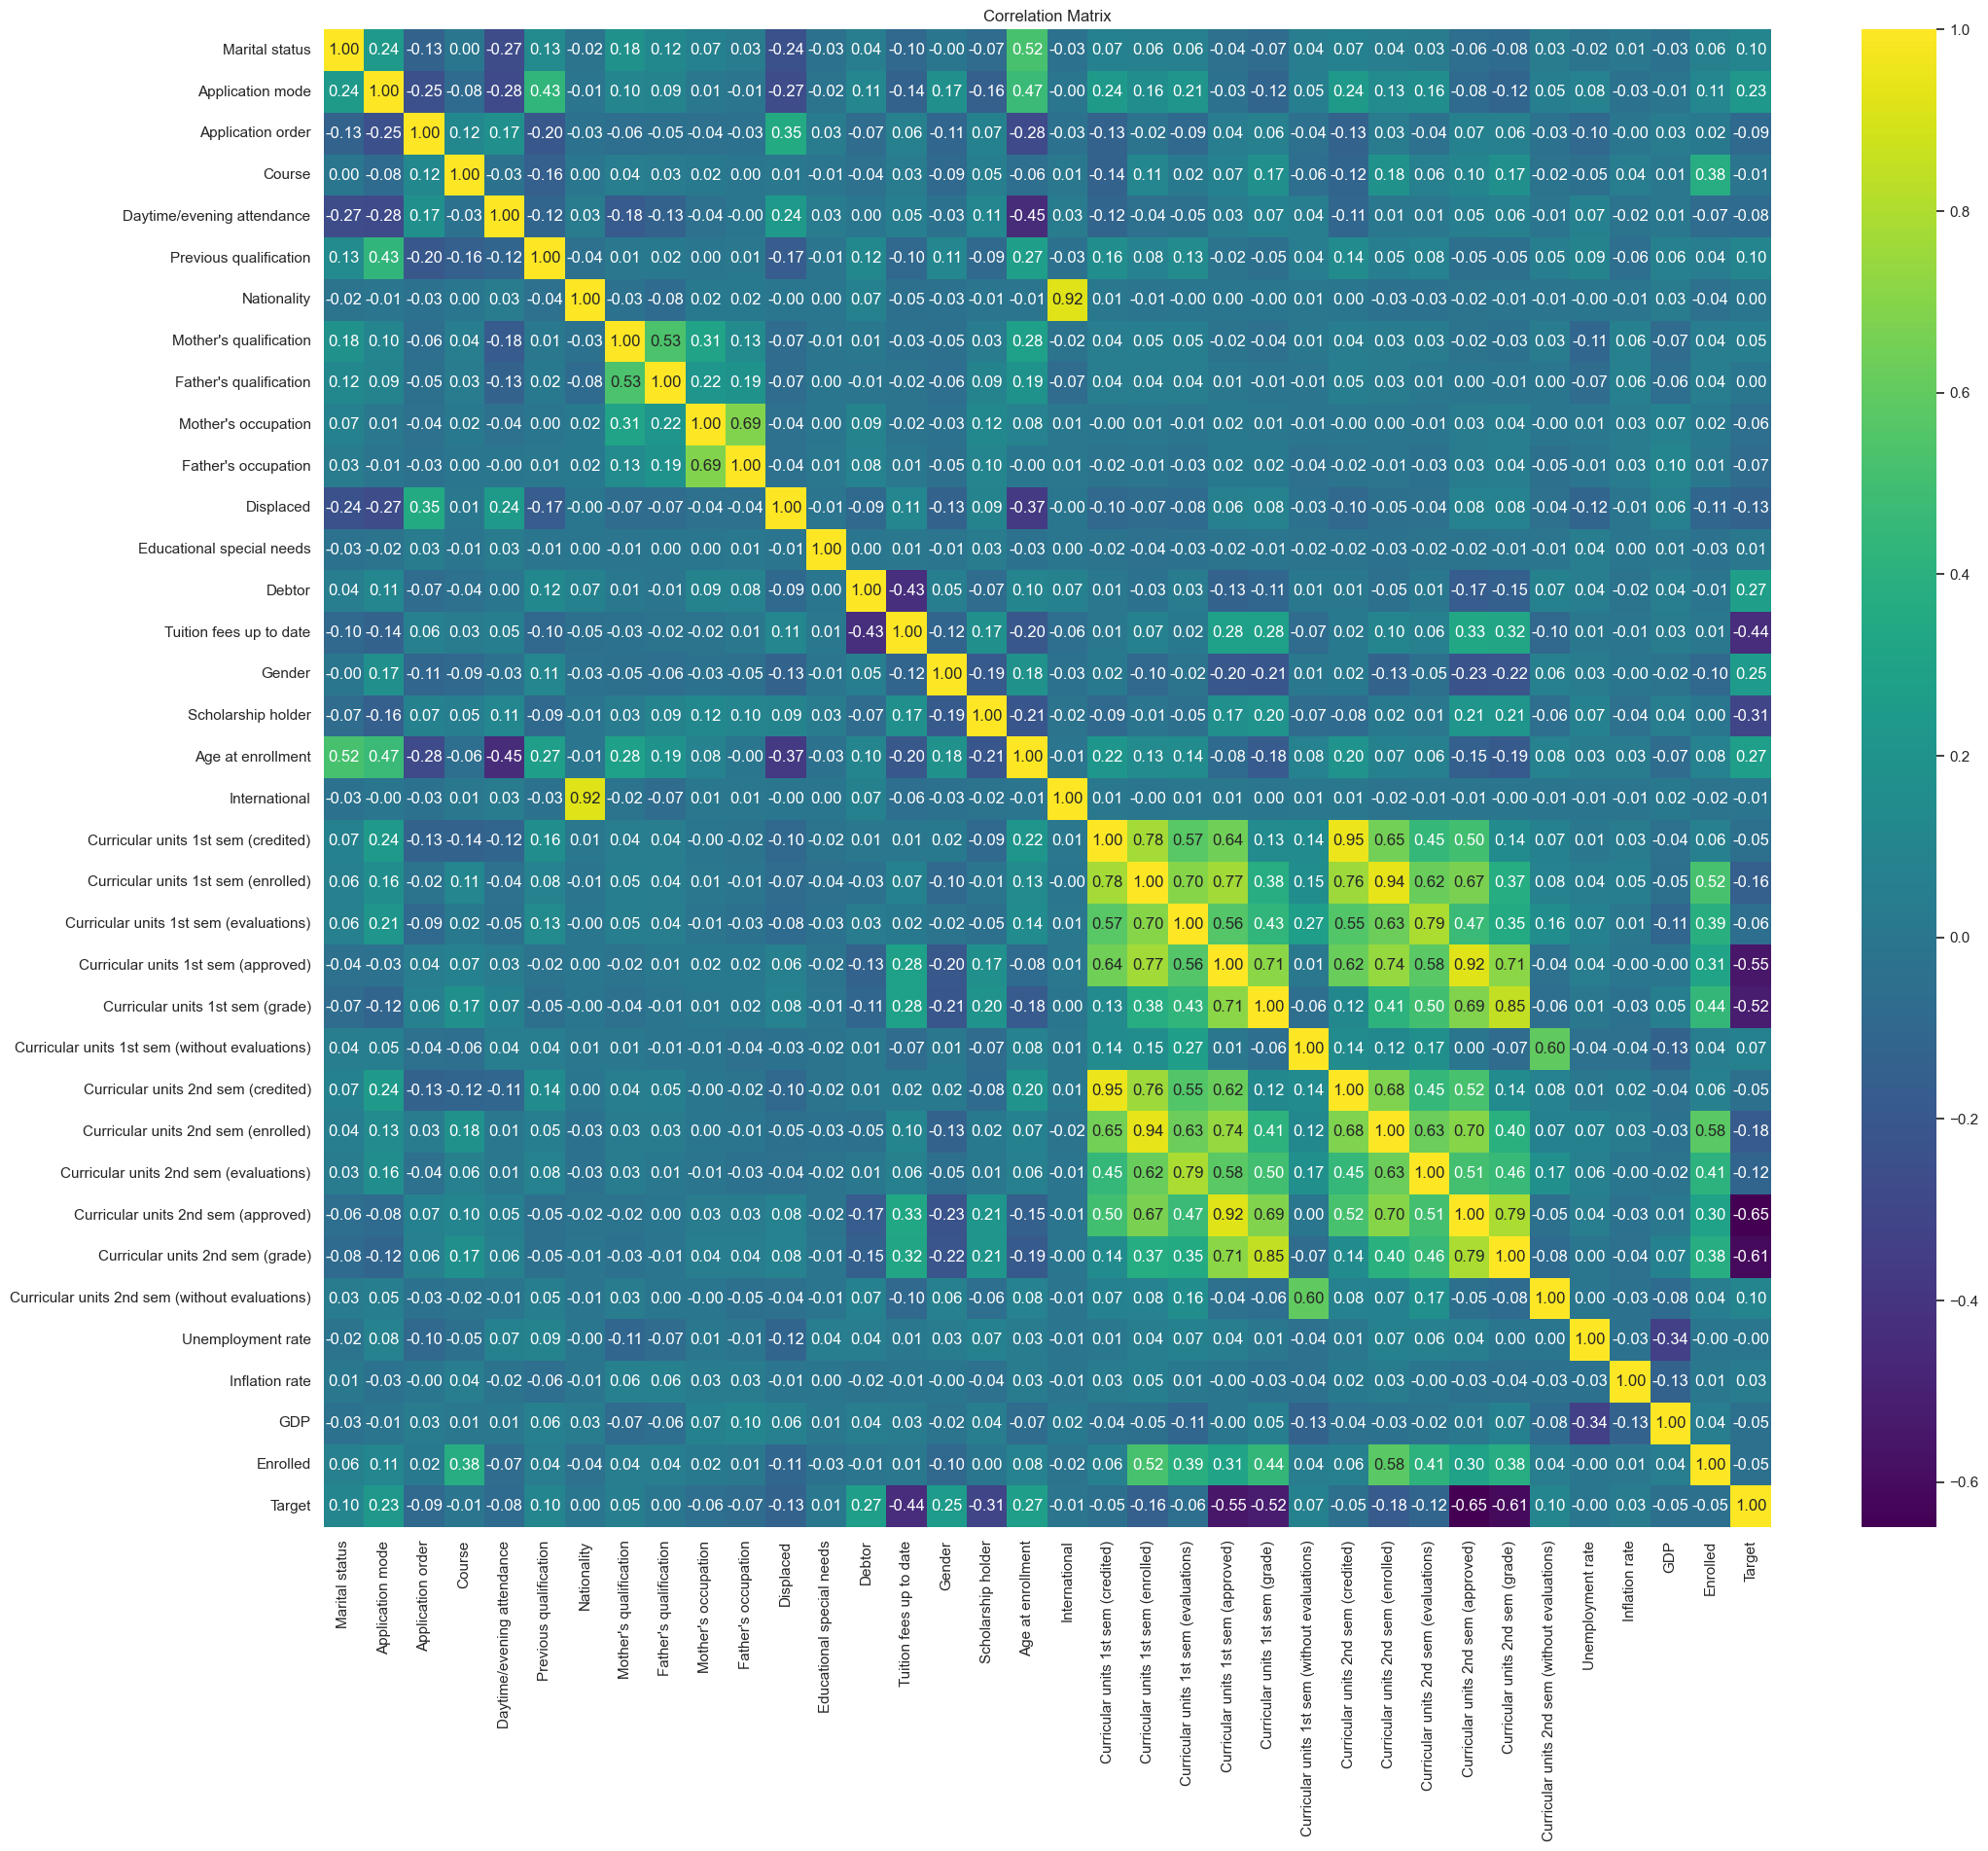

In [71]:
sns.set(rc={"figure.figsize": (24, 20)})  # Increased the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [72]:
# Demographic
demographics = df[
    [
        "Marital status",
        "Nationality",
        "Displaced",
        "Gender",
        "Age at enrollment",
        "International",
        "Target",
    ]
]
# Academic
academic_path = df[
    [
        "Curricular units 1st sem (credited)",
        "Curricular units 1st sem (enrolled)",
        "Curricular units 1st sem (evaluations)",
        "Curricular units 1st sem (approved)",
        "Curricular units 1st sem (grade)",
        "Curricular units 1st sem (without evaluations)",
        "Curricular units 2nd sem (credited)",
        "Curricular units 2nd sem (enrolled)",
        "Curricular units 2nd sem (evaluations)",
        "Curricular units 2nd sem (approved)",
        "Curricular units 2nd sem (grade)",
        "Curricular units 2nd sem (without evaluations)",
        "Target",
    ]
]

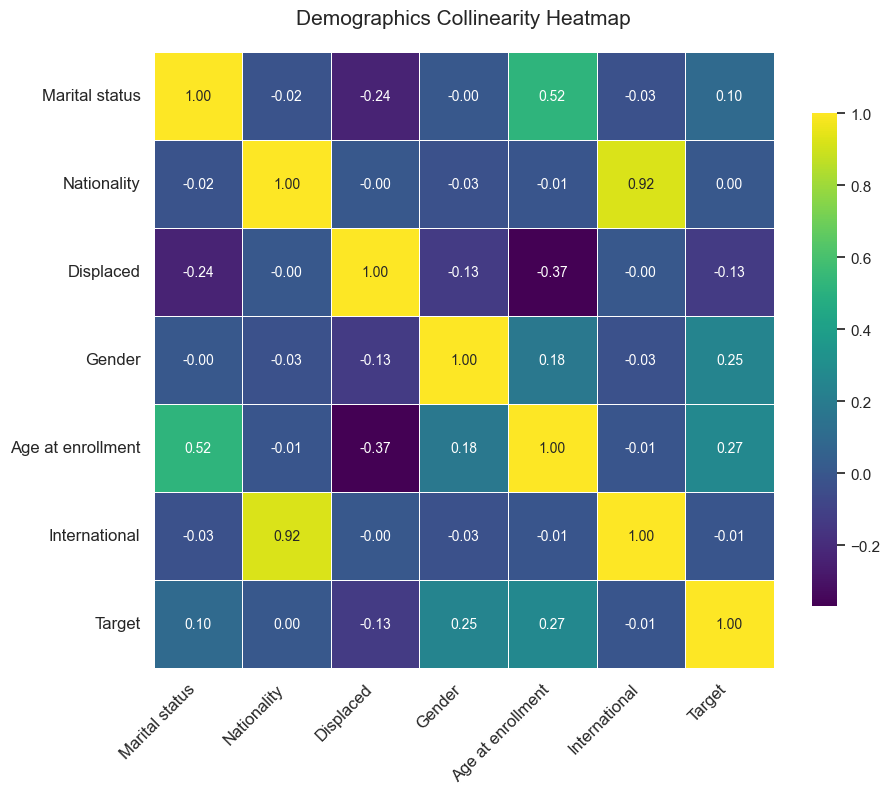

In [73]:
sns.set(rc={"figure.figsize": (10, 8)})
sns.heatmap(
    demographics.corr().round(2),
    linewidths=0.5,
    annot=True,
    annot_kws={"size": 10},
    cmap="viridis",
    cbar_kws={"shrink": 0.8},
    fmt=".2f",
)

plt.title("Demographics Collinearity Heatmap", pad=20, fontsize=15)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [74]:
features_to_drop = ["Nationality", "International"]
features_to_drop

['Nationality', 'International']

In [75]:
features_to_drop.extend(
    [
        "Curricular units 1st sem (credited)",
        "Curricular units 1st sem (enrolled)",
        "Curricular units 1st sem (evaluations)",
        "Curricular units 1st sem (approved)",
        "Curricular units 1st sem (grade)",
        "Curricular units 1st sem (without evaluations)",
        "Curricular units 2nd sem (credited)",
        "Curricular units 2nd sem (without evaluations)",
    ]
)
features_to_drop

['Nationality',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (without evaluations)']

In [76]:
df.drop(features_to_drop, axis=1, inplace=True)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Age at enrollment,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Enrolled,Target
0,1,8,5,2,1,1,13,10,6,10,...,20,0,0,0,0.000000,10.8,1.4,1.74,0,True
1,1,6,1,11,1,1,1,3,4,4,...,19,6,6,6,13.666667,13.9,-0.3,0.79,1,False
2,1,1,5,5,1,1,22,27,10,10,...,19,6,0,0,0.000000,10.8,1.4,1.74,1,True
3,1,8,2,15,1,1,23,27,6,4,...,20,6,10,5,12.400000,9.4,-0.8,-3.12,1,False
4,2,12,1,3,0,1,22,28,10,10,...,45,6,6,6,13.000000,13.9,-0.3,0.79,1,False


In [77]:
df.corr()["Target"]

Marital status                            0.100479
Application mode                          0.233888
Application order                        -0.094355
Course                                   -0.006814
Daytime/evening attendance               -0.084496
Previous qualification                    0.102795
Mother's qualification                    0.048459
Father's qualification                    0.003850
Mother's occupation                      -0.064195
Father's occupation                      -0.073238
Displaced                                -0.126113
Educational special needs                 0.007254
Debtor                                    0.267207
Tuition fees up to date                  -0.442138
Gender                                    0.251955
Scholarship holder                       -0.313018
Age at enrollment                         0.267229
Curricular units 2nd sem (enrolled)      -0.182897
Curricular units 2nd sem (evaluations)   -0.119239
Curricular units 2nd sem (appro

### **Logistic regression**

In [78]:
X = df.drop(columns="Target", axis=1)
y = df["Target"]

In [79]:
X.shape

(3630, 25)

In [80]:
print("X: ", type(X))
print("y: ", type(y))

X:  <class 'pandas.core.frame.DataFrame'>
y:  <class 'pandas.core.series.Series'>


In [81]:
# Step 1: Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Standardize the feature variables (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
}

# Step 5: Perform Grid Search with cross-validation
logreg = LogisticRegression(max_iter=500, random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

# Display best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Step 6: Train the logistic regression model with the best hyperparameters
best_logreg = grid_search.best_estimator_
best_logreg.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred = best_logreg.predict(X_test_scaled)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Test Set Accuracy: 0.91
Confusion Matrix:
[[431  18]
 [ 47 230]]
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.96      0.93       449
        True       0.93      0.83      0.88       277

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



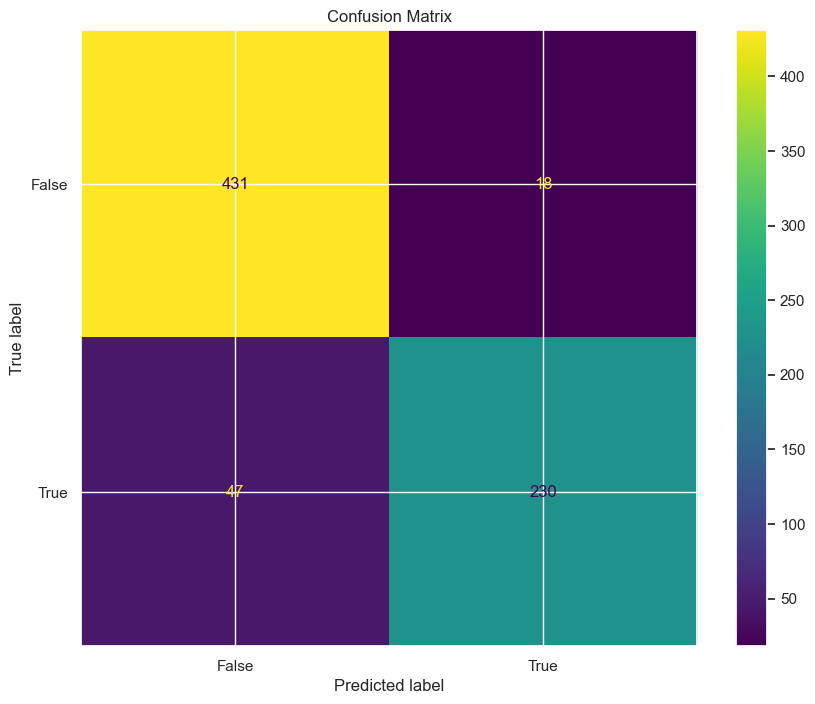

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay

# Import necessary library for plotting

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="viridis")
plt.title("Confusion Matrix")
plt.show()

In [83]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy for testing data: {accuracy:.3f}")
print(f"Recall for testing data: {recall:.3f}")
print(f"Precision for testing data: {precision:.3f}")
print(f"F1 Score for testing data: {f1:.3f}")

Accuracy for testing data: 0.910
Recall for testing data: 0.830
Precision for testing data: 0.927
F1 Score for testing data: 0.876


In [84]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Step 2: Load and preprocess the data
# Assuming df is your DataFrame and 'Target' is the column you want to predict
X = df.drop(columns="Target")  # Features
y = df["Target"]  # Target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define the models and their hyperparameter grids
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=500, random_state=42),
        "params": {
            "C": [0.01, 0.1, 1, 10, 100],
            "penalty": ["l1", "l2"],
            "solver": ["liblinear", "saga"],
        },
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
        },
    },
    "Support Vector Machine": {
        "model": SVC(random_state=42),
        "params": {
            "C": [0.1, 1, 10, 100],
            "kernel": ["linear", "rbf", "poly"],
            "gamma": ["scale", "auto"],
        },
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
        },
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan"],
        },
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "criterion": ["gini", "entropy"],
        },
    },
}

# Step 6: Perform Grid Search with cross-validation for each model
best_models = {}
for name, model_info in models.items():
    grid_search = GridSearchCV(
        model_info["model"], model_info["params"], cv=5, scoring="accuracy"
    )
    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name} - Best Hyperparameters: {grid_search.best_params_}")

# Step 7: Train each model on the training data and evaluate on the test set
for name, model in best_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} - Test Set Accuracy: {accuracy:.2f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"{name} - Confusion Matrix:")
    print(conf_matrix)

    # Classification report
    class_report = classification_report(y_test, y_pred)
    print(f"{name} - Classification Report:")
    print(class_report)

Logistic Regression - Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Random Forest - Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Support Vector Machine - Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Gradient Boosting - Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
K-Nearest Neighbors - Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Decision Tree - Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}

Logistic Regression - Test Set Accuracy: 0.91
Logistic Regression - Confusion Matrix:
[[431  18]
 [ 47 230]]
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.96      0.93       449
        True       0.93      0.83      0.88       277

    accuracy                           0.91       726
   macro avg       0.

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.910468   0.927419  0.830325  0.876190
1           Random Forest  0.895317   0.900398  0.815884  0.856061
2  Support Vector Machine  0.899449   0.928571  0.797834  0.858252
3       Gradient Boosting  0.899449   0.901575  0.826715  0.862524
4     K-Nearest Neighbors  0.851240   0.908213  0.678700  0.776860
5           Decision Tree  0.866391   0.860000  0.776173  0.815939


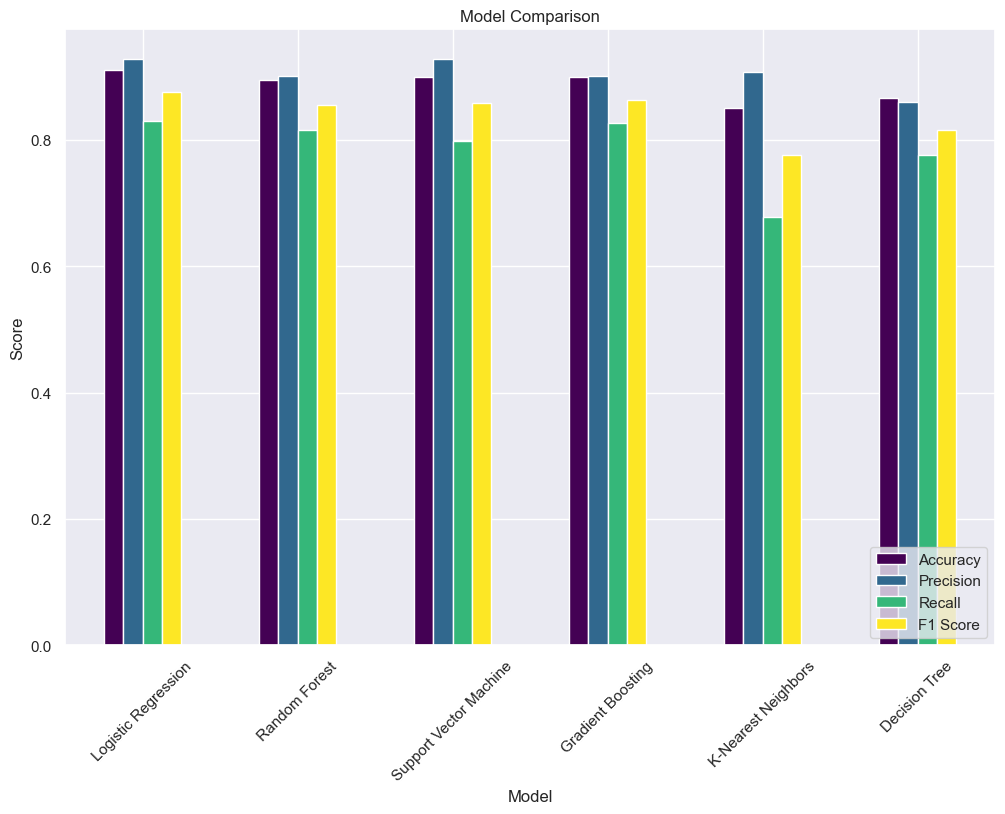

In [85]:
import pandas as pd

# Create a dictionary to store the evaluation metrics for each model
model_comparison = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
}


# Define a function to evaluate and store metrics
def evaluate_model(name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_comparison["Model"].append(name)
    model_comparison["Accuracy"].append(accuracy)
    model_comparison["Precision"].append(precision)
    model_comparison["Recall"].append(recall)
    model_comparison["F1 Score"].append(f1)


# Evaluate each model
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    evaluate_model(name, y_test, y_pred)

# Convert the dictionary to a DataFrame
comparison_df = pd.DataFrame(model_comparison)

# Display the comparison DataFrame
print(comparison_df)

# Plot the comparison
comparison_df.set_index("Model").plot(kind="bar", figsize=(12, 8), colormap="viridis")
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()

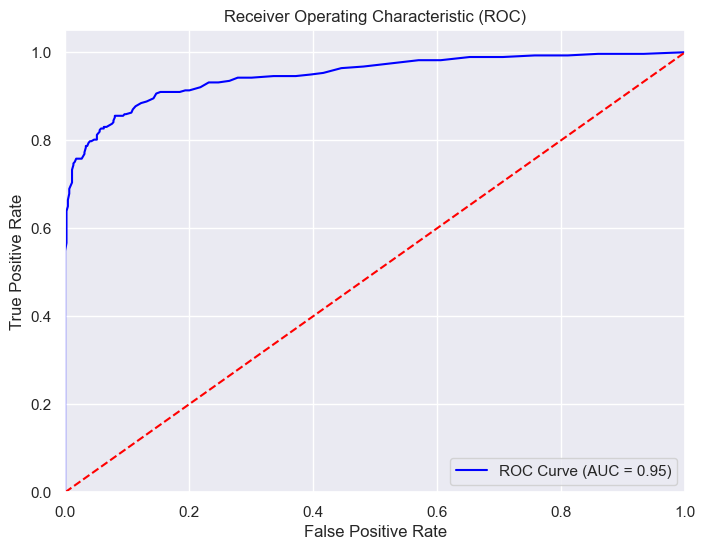

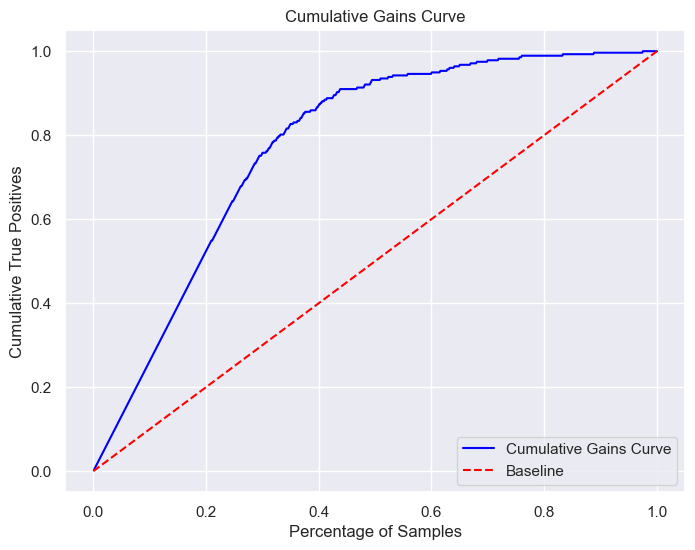

In [88]:
# Step 1: Import necessary libraries
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X_train_scaled, y_train, X_test_scaled, and y_test are already defined

# Train the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Predict probabilities
y_pred_prob = rf_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()


# Step 7: Cumulative Gains Curve
def plot_cumulative_gains(y_true, y_pred_proba):
    data = pd.DataFrame({"true": y_true, "probability": y_pred_proba}).sort_values(
        by="probability", ascending=False
    )

    total_positive = np.sum(data["true"])
    cumulative_gains = np.cumsum(data["true"]) / total_positive
    cumulative_percentage = np.arange(1, len(data) + 1) / len(data)

    plt.figure(figsize=(8, 6))
    plt.plot(
        cumulative_percentage,
        cumulative_gains,
        label="Cumulative Gains Curve",
        color="blue",
    )
    plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Baseline")
    plt.xlabel("Percentage of Samples")
    plt.ylabel("Cumulative True Positives")
    plt.title("Cumulative Gains Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


# Call the cumulative gains function
plot_cumulative_gains(y_test, y_pred_prob)

In [89]:
import joblib

# Save the trained logistic regression model
joblib.dump(logreg, "logistic_regression_model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

End of Document